<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with neural networks in tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

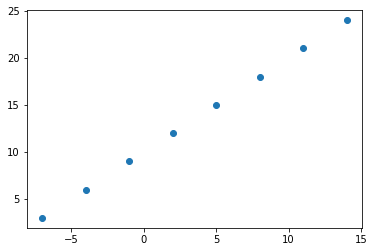

In [3]:
#Create Features 
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it 

plt.scatter(X,y)

In [4]:
y = X + 10
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

input and output shapes

In [5]:
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape , output_shape

((8,), (8,))

In [7]:
# turn numpy array into tensors

X = tf.constant(X, dtype= tf.float32)
y = tf.constant(y, dtype = tf.float32)
X.shape, y.shape
X
y

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in tenorflow

In [9]:
tf.random.set_seed(42)

# 1. Create a model using sequential API
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. compile a model 

model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model

model.fit(tf.expand_dims(X,axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 360ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# try and make prediction on model

model.predict([17.0])

array([[12.716021]], dtype=float32)

##Improving our model

In [11]:
# let's rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis= -1),y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

In [12]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17])

array([[29.739855]], dtype=float32)

In [14]:
# let's try be using Adam optimizer and an extra layer

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 14ms/step 

In [15]:
model.predict([17])

array([[27.159163]], dtype=float32)

In [16]:
# lets create a bigger data

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

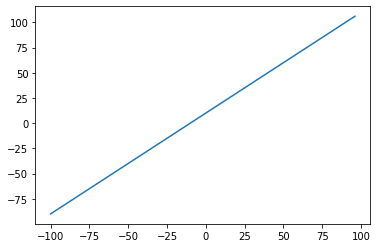

In [18]:
import matplotlib.pyplot as plt

plt.plot(X,y)

In [19]:
len(X)

50

In [20]:
# split the data in train test split

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# visualize the model

## visualize the data

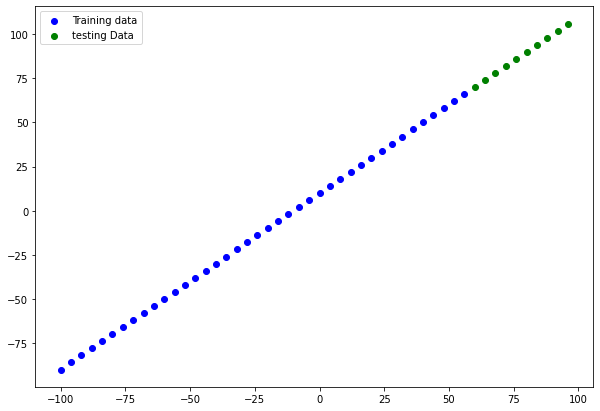

In [21]:

# visualise the data

plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c = 'b', label = 'Training data')

plt.scatter(X_test,y_test, c = 'g', label = 'testing Data')

plt.legend()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

In [23]:
X.shape

TensorShape([50])

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape= [1],name= 'input_layer'),
    tf.keras.layers.Dense(1, name= 'output_layer')
], name= 'first_model')

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [25]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train , epochs=100 , verbose=0)

In [27]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


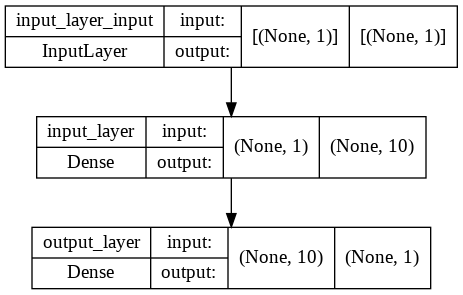

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)

## visualizing the model prediction

In [29]:
# make some prediction 

y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [30]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

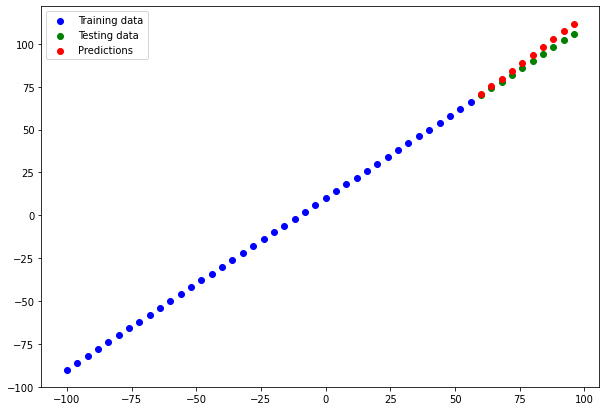

In [33]:
plot_predictions(train_data= X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

##Evaluating our model's prediction with regression evaluation metrics

In [34]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 288ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [35]:
tf.keras.losses.MAE(y_test,y_pred )

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [36]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [37]:
y_test.shape

TensorShape([10])

In [38]:
y_pred.shape

(10, 1)

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [40]:
mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred= tf.squeeze(y_pred))

In [41]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [42]:
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [55]:
# let's make some function to reuse MAE and MSE

def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_test,
                                        y_pred = tf.squeeze(y_pred))
  
def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred  = tf.squeeze(y_pred))

###run experiments to improve our model

In [56]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ["mae"])

model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

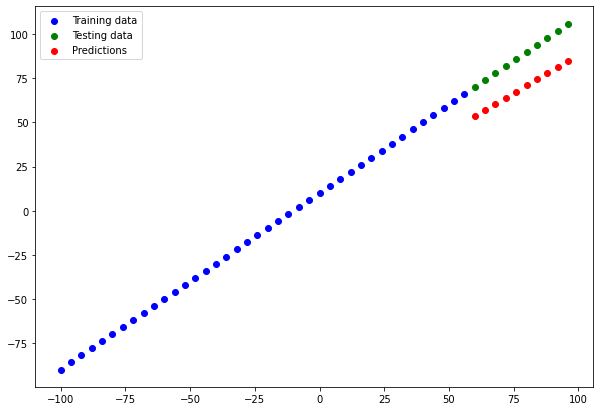

In [57]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions= y_pred_1)

In [59]:
# calculate model_1 evaluation metrics

mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [61]:
# create model_2 

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics = ['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

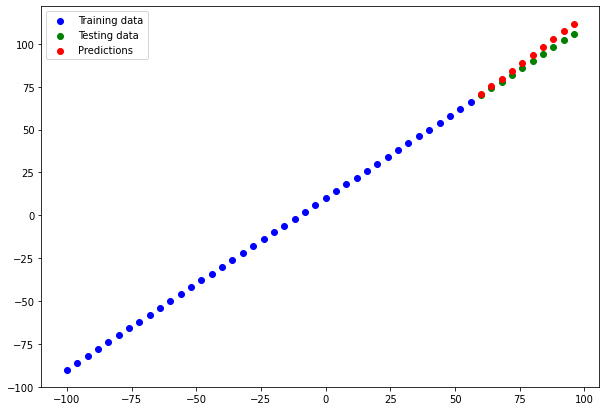

In [62]:
# make a plot predictions of model_2

y_pred_2 = model_2(X_test)
plot_predictions(predictions= y_pred_2)

In [63]:
# calculate evaluation metrics for model_2

mae_2 = mae(y_test,y_pred_2)
mse_2  = mse(y_test, y_pred_2)
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [64]:
# create model_3 

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(tf.expand_dims(X_train, axis= -1 ), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 42.5822 - mae: 42.5822
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 10.9331 - mae: 10.9331
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 26.9259 - mae: 26.9259
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 13.6703 - mae: 13.6703
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 15.1926 - mae: 15.1926
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 12.0801 - mae: 12.0801
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4040 - mae: 11.4040
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1956 - mae: 11.1956
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 41.6513 - mae: 41.6513
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.8935 - mae: 28.8935
Epoch 11/500
2/2 [==============================] - 0s 6

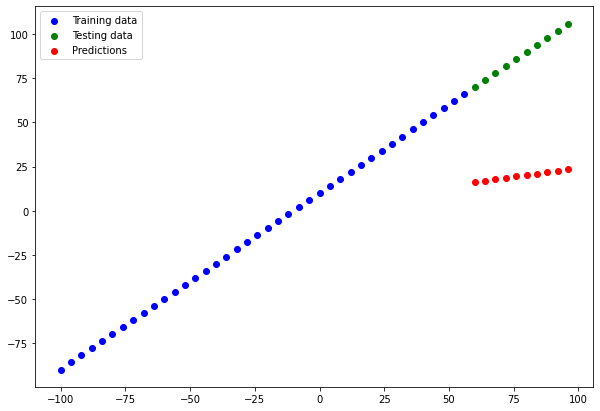

In [65]:
# plot model_3 predictions

y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions= y_pred_3)

In [66]:
# calculate evaluation metrics for model_3

mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.149315>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4729.35>)

### comparing the results of our experiment

In [70]:
# let's compare our results using pandas dataframe
import pandas as pd

model_result = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2',mae_2.numpy(), mae_2.numpy()],
                ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_result, columns= ['model', 'mae', 'mse'])

all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,3.196941
2,model_3,68.149315,4729.350098


## Saving our model



In [72]:
# save model using SavedModel format

model_2.save("first_model_savedModel_format")

INFO:tensorflow:Assets written to: first_model_savedModel_format/assets


INFO:tensorflow:Assets written to: first_model_savedModel_format/assets


In [73]:
# save model using HDF5 format

model_2.save('first_model_HDF5_format.h5')

## loading in a saved model

In [74]:
loaded_savedmodel_format = tf.keras.models.load_model("/content/first_model_savedModel_format")
loaded_savedmodel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [76]:
model_2_pred = model_2.predict(X_test)

loaded_savedmodel_predict = loaded_savedmodel_format.predict(X_test)

model_2_pred == loaded_savedmodel_predict

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [79]:
model_2_pred ,loaded_savedmodel_predict

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [84]:
# load a model using .h5 format

loaded_h5_format = tf.keras.models.load_model("/content/first_model_HDF5_format.h5")

In [85]:
loaded_h5_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [86]:
model_2_predict = model_2.predict(X_test)
model_h5_predict = loaded_h5_format.predict(X_test)

model_2_predict == model_h5_predict

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])